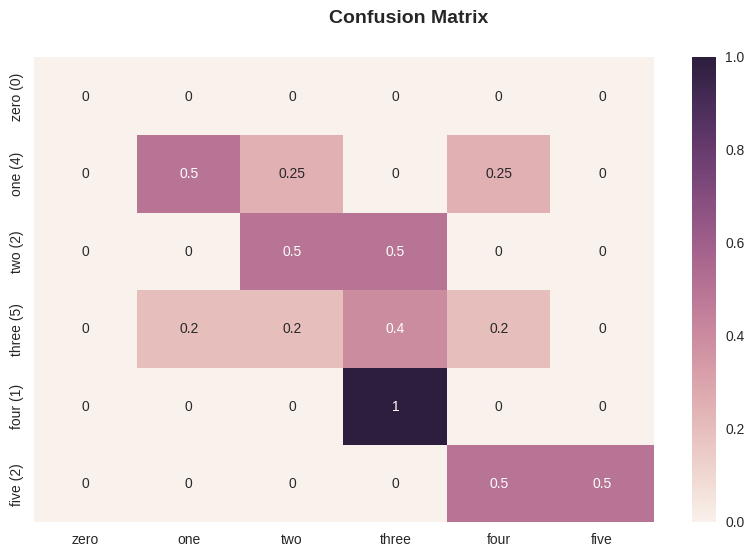

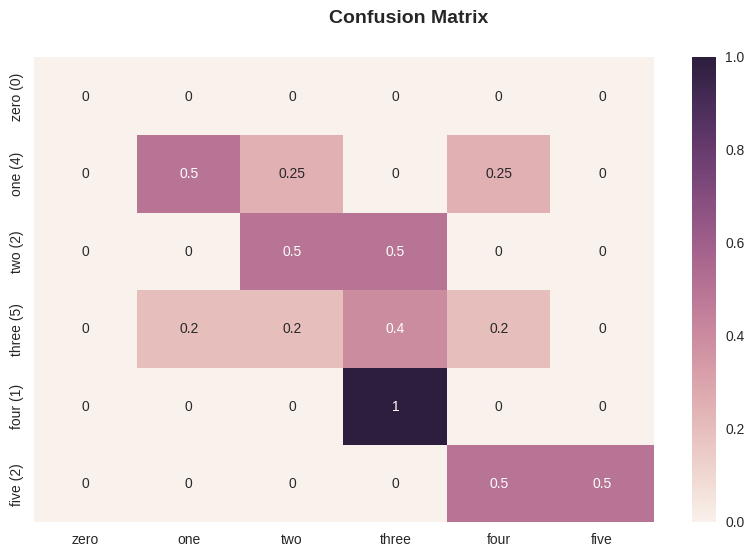

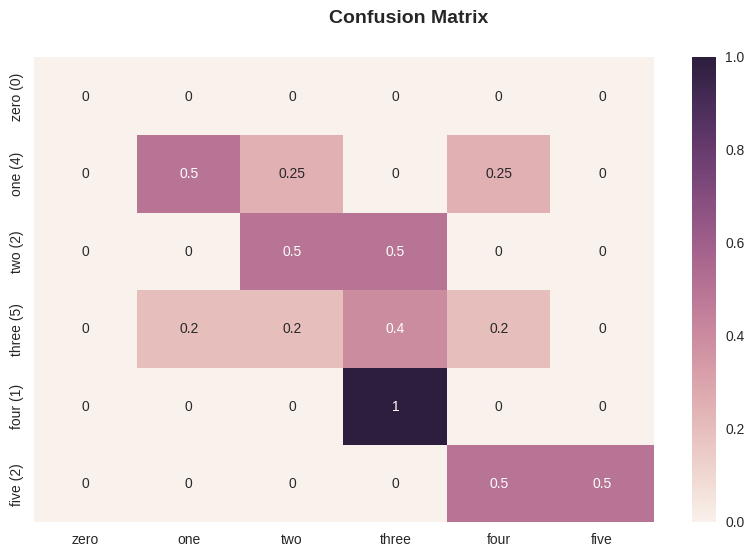

In [12]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython import display
from random import uniform
from collections import OrderedDict, Counter
import seaborn as sn

def generate_random_matrix(length):
    matrix = []
    for i in range(length):
        row = []
        for j in range(length):
            row.append(uniform(0, 1))
        matrix.append(row)
        
    return matrix




LOCATION_TARGET = {
    0: "zero",
    1: "one",
    2: "two",
    3: "three",
    4: "four",
    5: "five"
}


prediction_set = [(1,1), (1,4), (5,5), (3,3), (2,3), (1,2), (5,4), (4,3), (3,1), (1,1), (2,2), (3,4), (3,2), (3,3)]     

def generate_confusion_matrix(prediction_set, target_dict):
    
    # Generate a dictionary to add up all the predictions vs. the true targets
    prediction_targets = {}
    for location in target_dict.keys():
        prediction_targets[int(location)] = []
    
    # Add all the targets of a particular prediction into an array
    for prediction, target in prediction_set:
        prediction_targets[prediction].append(target)
        
    # Count the amount of times a given target is present for every prediction
    occurances = {}
    sums = {}
    for prediction, targets in prediction_targets.items():
        occurances[prediction] = dict(Counter(targets))
        sums[prediction] = len(targets)
    
    print(occurances)
    confusion_matrix = np.zeros((len(target_dict), len(target_dict)), dtype=np.float32)
    for i in range(len(target_dict)):
        for j in range(len(target_dict)):
            confusion_matrix[i][j] = float(occurances[i].get(j, 0)) / sums[i] if sums[i] > 0 else 0.0
    
    row_labels = []
    col_labels = []
    for location, target_name in OrderedDict(target_dict).items():
        row_labels.append("{} ({})".format(target_name, sums[location]))
        col_labels.append(target_name)
    
    
    df_cm = pd.DataFrame(confusion_matrix, 
                         index = row_labels,
                         columns = col_labels)

    title = "Confusion Matrix"
    plt.figure(figsize = (10,6))
    plt.suptitle(title, fontsize=14, fontweight='bold')
    confusion = sn.heatmap(df_cm, annot=True)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plt.savefig("confusion_matrix.png")

for i in range(3):
    generate_confusion_matrix(prediction_set, LOCATION_TARGET)
    time.sleep(2)
